In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [2]:
%matplotlib inline

# 1d case

In [5]:
fs = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6)[::1]:
    fs.append(h5py.File(f'3d\\data_1em2_serial{n}.hdf5', 'r'))

In [6]:
fs

[<HDF5 file "data_1em2_serial0.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial1.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial2.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial3.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial4.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial5.hdf5" (mode r)>]

In [7]:
fs[0]['Domain/x'].shape
print(fs[0]['Primitive'])

<HDF5 group "/Primitive" (16 members)>


In [8]:
fs[0]['Primitive/pi11'].shape

(20, 8, 8)

In [9]:
fs[0]['Domain'].attrs.keys()

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>

In [10]:
fs[0]['Optional'].attrs.keys()

<KeysViewHDF5 ['eta', 'kappa', 'nOptionalSimArgs', 'tau_Pi', 'tau_pi', 'tau_q', 'zeta']>

In [11]:
eta = fs[0]['Optional'].attrs['eta'][0]
tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
print(f"Dissipation strength {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 0.0, relaxation time 0.2, timestep 0.0028867513459481294


In [12]:
fs[-1].attrs['t']

array([0.4])

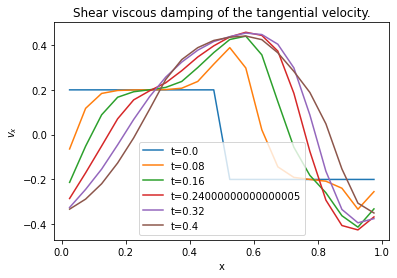

In [14]:
for f in fs:
    #print(f.attrs['t'][0])
    plt.plot(f['Domain/x'], f['Primitive/v1'][:,4,4], label='t=' + str(f.attrs['t'][0]))
plt.xlabel('x')
plt.ylabel('$v_{x}$')
plt.title('Shear viscous damping of the tangential velocity.')
plt.legend()
plt.show()
#fig.savefig('vy_erf.png', bbox_inches='tight')

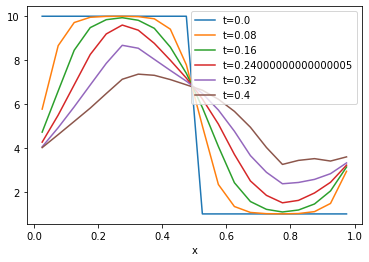

In [16]:
for f in fs:
    #print(f.attrs['t'][0])
    plt.plot(f['Domain/x'], f['Primitive/n'][:,4,4], label='t=' + str(f.attrs['t'][0]))
plt.xlabel('x')
plt.legend()

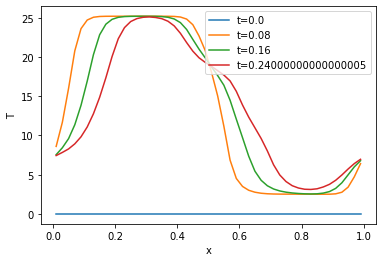

In [19]:
for f in fs:
    #print(f.attrs['t'][0])
    plt.plot(f['Domain/x'], f['Auxiliary/rho_plus_p'][:,10,10], label='t=' + str(f.attrs['t'][0]))
plt.xlabel('x')
plt.ylabel('T')
plt.legend()
plt.show()

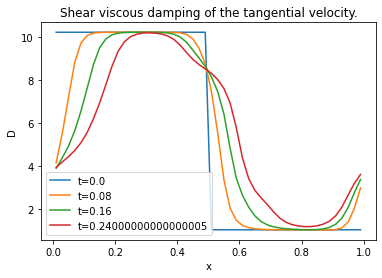

In [18]:
for f in fs:
    #print(f.attrs['t'][0])
    plt.plot(f['Domain/x'], f['Conserved/D'][:,10,10], label='t=' + str(f.attrs['t'][0]))
plt.xlabel('x')
plt.ylabel('D')
plt.title('Shear viscous damping of the tangential velocity.')
plt.legend()
plt.show()

In [55]:
fs[0].keys()

<KeysViewHDF5 ['Domain', 'Optional', 'Primitive']>

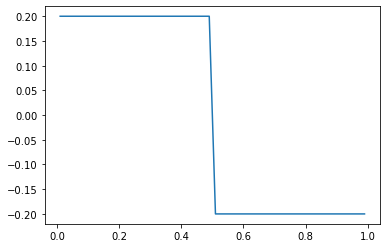

In [17]:
plt.figure()
plt.plot(fs[0]['Domain/x'], fs[0]['Primitive/v1'][:,10,10])
plt.show()

[1.21993034 1.29735538 1.35103064 1.40645155 1.47349622 1.55591833
 1.66028618 1.79316443 1.96208442 2.17686223 2.44381565 2.76767401
 3.15581461 3.61240033 4.10269936 4.50305744 4.77511683 4.81400129
 4.70614908 4.55090526 4.39750852 4.26412269 4.14809028 4.04117165
 3.94471639 3.8683768  3.80725831 3.74653966 3.70134471 3.67536051
 3.6623797  3.67101076 3.7124077  3.79228187 3.84825323 3.84110626
 3.77014003 3.61293061 3.35241927 2.94346818 2.42211973 1.96486093
 1.67992882 1.46756338 1.34497728 1.26404434 1.19633464 1.15904623
 1.14165422 1.15609339]


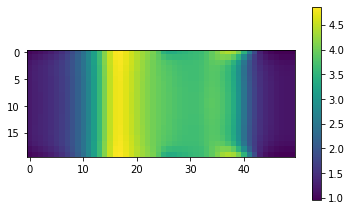

In [15]:
print(fs[-1]['Primitive/p'][:,16,16])
plt.figure()
mappable = plt.imshow(fs[-1]['Primitive/p'][:,0:20:1,16].transpose())
plt.colorbar(mappable,orientation="vertical",shrink=0.89,anchor=(0.8,0.5))
plt.show()

In [18]:
Tall = np.zeros((len(fs), fs[0]['Primitive/v2'][:,10,10].shape[0]))
for i, f in enumerate(fs):
    Tall[i, :] = f['Primitive/v2']

ValueError: could not broadcast input array from shape (50,20,20) into shape (50,)

<IPython.core.display.Javascript object>


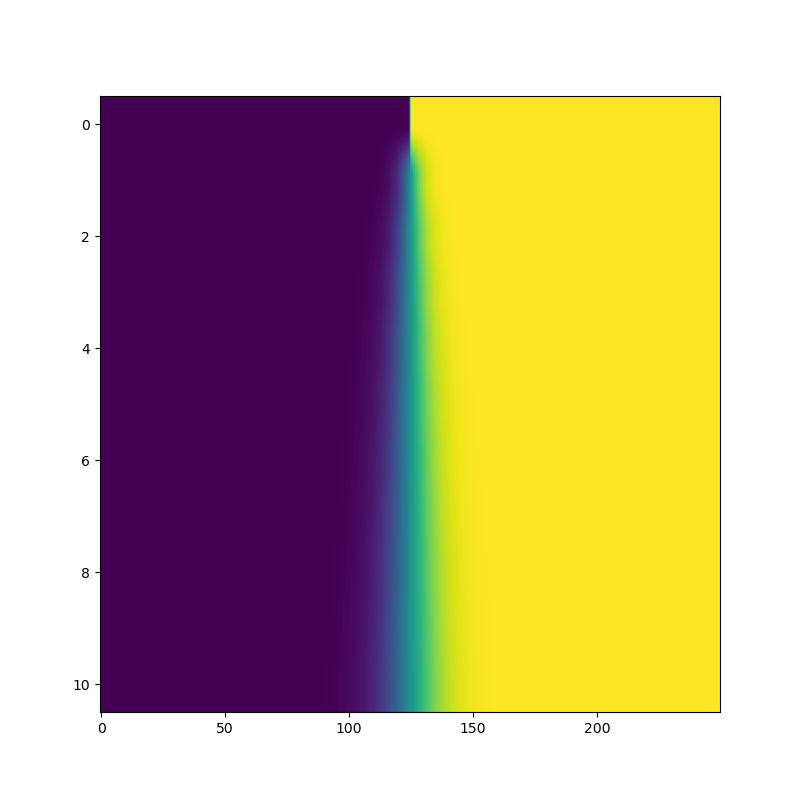

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(Tall, aspect='auto')
plt.show()

This figure is all about showing that the features propagate at the expected wave speed.

<IPython.core.display.Javascript object>


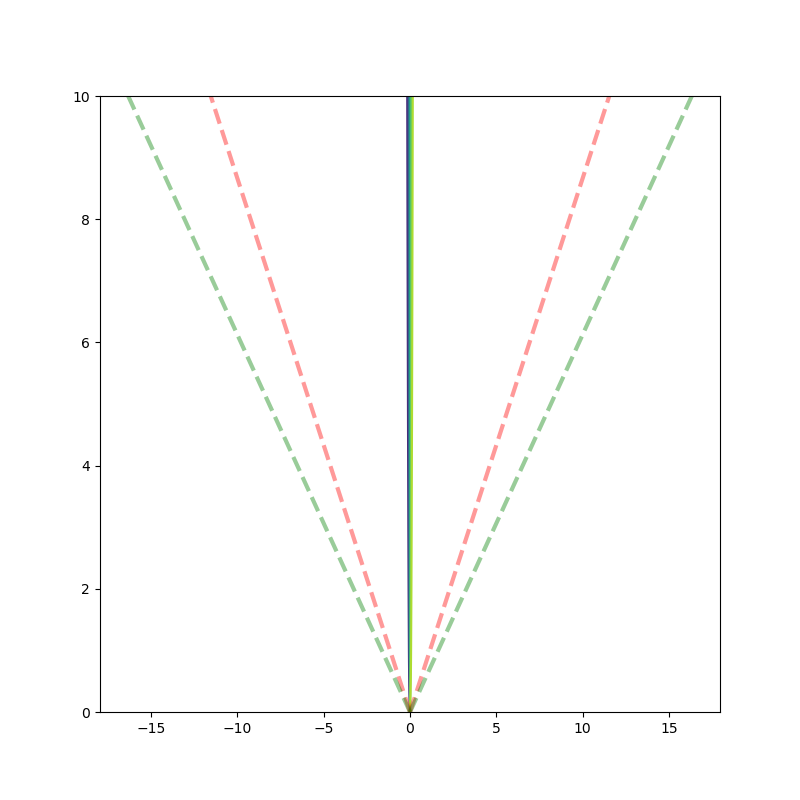

In [36]:
plt.figure(figsize=(8,8))
t = np.linspace(fs[0].attrs['t'], fs[-1].attrs['t'], len(fs)).flatten()
x = fs[0]['Domain/x']
plt.contour(x, t, Tall)
speed = np.sqrt((4*eta)/(3*tau_pi))
plt.plot(speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(np.sqrt(2)*speed*t, t, 'g--', lw=3, alpha=0.4)
plt.plot(-np.sqrt(2)*speed*t, t, 'g--', lw=3, alpha=0.4)
plt.show()

# 2d case

In [37]:
fs = []
files = sorted(glob.glob('2d/data*hdf5'), key=os.path.getmtime)
for f in files:
    fs.append(h5py.File(f, 'r'))

In [38]:
fs = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(11):
    fs.append(h5py.File(f'2d\\data_serial{n}.hdf5', 'r'))

OSError: Unable to open file (unable to open file: name = '2d\data_serial0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
fs[0]['Domain'].attrs['dy']

In [ ]:
fs[0]['Domain/y'].shape

In [ ]:
fs[0]['Primitive/vx'].shape

In [ ]:
eta = fs[0]['Optional'].attrs['eta'][0]
tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
print(f"Dissipation strength {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

In [ ]:
fs[-1].attrs['t']

In [ ]:
plt.figure()
for f in fs:
    plt.plot(f['Domain/x'], f['Primitive/vy'][:,64])
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(5,2))
for f, ax in zip(fs[:10], axes.flatten()):
    ax.imshow(f['Primitive/vy'], vmin=-0.5, vmax=0.5)
#     ax.set_title(f"Time {f.attrs['t'][0]:.1f}")
    ax.axis('off')
fig.tight_layout()
plt.subplots_adjust(wspace=0.02,hspace=0.02)
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/vx'].shape
plt.figure()
for i in range(len(fs)//2):
    plt.plot(fs[2*i]['Domain/x'], fs[2*i]['Primitive/vy'][:, ny//2])
    plt.plot(fs[2*i]['Domain/y'], fs[2*i]['Primitive/vy'][nx//2, :])
    plt.show()
#plt.plot(fs[2*i]['Domain/y'], fs[2*i]['Primitive/vy'][nx//2, :])
#plt.show()    

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Primitive/qx'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Primitive/qy'][nx//2, :])
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Auxiliary/dxT'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Auxiliary/dyT'][nx//2, :])
plt.show()